# Machine Learning Model

In [96]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carrega Base de dados Tratada

In [97]:
base = pd.read_csv("./data/base_tratada.csv", sep=";", usecols=None)
print(base.shape)
base.head()

(13580, 10)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,2,1480000.0,2.5,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3
1,2,1035000.0,2.5,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4
2,3,1465000.0,2.5,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4
3,3,850000.0,2.5,2.0,1.0,94.0,-37.7969,144.9969,4019.0,4
4,4,1600000.0,2.5,1.0,2.0,120.0,-37.8072,144.9941,4019.0,4


## PreProcessamento da Base

### Min Max Scaler

In [98]:
# cols = [col for col in base.columns if col != "Price"]
# for col in cols:
#     # find minimum and maximum of that column
#     minimum = min(base[col])
#     maximum = max(base[col])
#     base[col] = (base[col] - minimum) / (maximum - minimum)

# print(base.shape)
# base.head()

### Standardization 

In [99]:
# standardization

scalar = preprocessing.StandardScaler()

# fit our data
cols = [col for col in base.columns if col != "Price"]
scaled_cols = scalar.fit_transform(base[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,-0.981463,-1.301485,-0.772376,-0.636847,-0.089316,0.121160,0.030640,-0.784625,-1.342079
1,-0.981463,-1.301485,-0.772376,-1.677692,-0.100843,0.016437,-0.017478,-0.784625,-0.979550
2,0.064876,-1.301485,0.673367,-1.677692,-0.106356,-0.001227,-0.007855,-0.784625,-0.979550
3,0.064876,-1.301485,0.673367,-0.636847,-0.116380,0.155226,0.016204,-0.784625,-0.979550
4,1.111216,-1.301485,-0.772376,0.403998,-0.109864,0.025269,-0.010742,-0.784625,-0.979550


In [100]:
for col in cols:
    base[col] = scaled_cols[col]

print(base.shape)
base.head()

(13580, 10)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,-0.981463,1480000.0,-1.301485,-0.772376,-0.636847,-0.089316,0.121160,0.030640,-0.784625,-1.342079
1,-0.981463,1035000.0,-1.301485,-0.772376,-1.677692,-0.100843,0.016437,-0.017478,-0.784625,-0.979550
2,0.064876,1465000.0,-1.301485,0.673367,-1.677692,-0.106356,-0.001227,-0.007855,-0.784625,-0.979550
3,0.064876,850000.0,-1.301485,0.673367,-0.636847,-0.116380,0.155226,0.016204,-0.784625,-0.979550
4,1.111216,1600000.0,-1.301485,-0.772376,0.403998,-0.109864,0.025269,-0.010742,-0.784625,-0.979550


## Model Training

In [101]:
## Input Split

X = base.drop(columns=['Price'])
y = base['Price']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"train {x_train.shape}")
print(f"test {x_test.shape}")

train (10185, 9)
test (3395, 9)


In [103]:
x_test.head()

,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
1061,0.064876,0.181004,0.673367,1.444843,0.007414,-1.507721,-0.030951,0.713632,-0.254491
6482,-0.981463,-1.403726,-0.772376,-0.636847,-0.139936,0.001296,-0.415893,-1.193220,-0.617021
8395,0.064876,-0.688041,-0.772376,-1.677692,-0.139936,-0.789802,-0.178191,1.321386,-0.979550
4659,0.064876,-0.040517,0.673367,-0.636847,-0.103349,1.186051,-0.583343,0.006985,-0.254491
7386,-0.981463,-0.176838,-0.772376,0.403998,-0.024161,-0.301517,-1.190589,-1.477797,0.833097


### Linear Regression

R2 0.4805994196314075


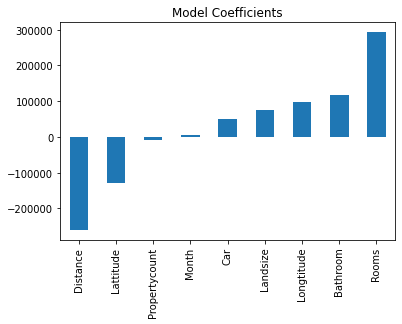

In [105]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(normalize=True)
model_lr.fit(x_train, y_train)

pred_lr = model_lr.predict(x_test)
# mean_sqr_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)
print("R2", r2_lr)

coef_lr = pd.Series(model_lr.coef_, X.columns).sort_values()
coef_lr.plot(kind='bar', title="Model Coefficients")
plt.show()

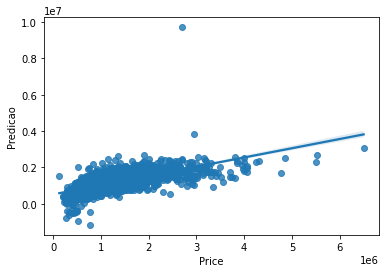

In [106]:
df_pred_lr = pd.concat([y_test.reset_index(drop=True), 
            pd.Series(pred_lr, name="Predicao")], 
            axis=1)

sns.regplot(x="Price", y="Predicao", data=df_pred_lr)
plt.show()

### Random Forest Regressor

R2 0.795345971438898


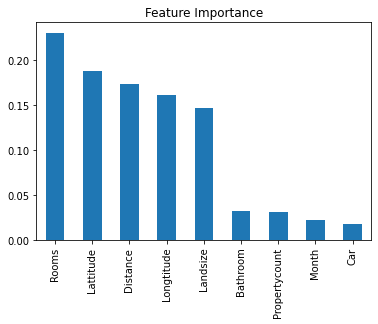

In [108]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)

pred_rfr = model_rfr.predict(x_test)
# mean_sqr_rfr = mean_squared_error(y_test, pred_rfr)
r2_rfr = r2_score(y_test, pred_rfr)
print("R2", r2_rfr)

coef_rfr = pd.Series(model_rfr.feature_importances_, X.columns).sort_values(ascending=False)
coef_rfr.plot(kind='bar', title="Feature Importance")
plt.show()

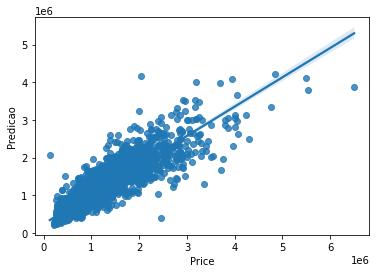

In [109]:
df_pred_rfr = pd.concat([y_test.reset_index(drop=True), 
            pd.Series(pred_rfr, name="Predicao")], 
            axis=1)

sns.regplot(x="Price", y="Predicao", data=df_pred_rfr)
plt.show()